<a href="https://colab.research.google.com/github/inwoo0415/Machine-Learning/blob/main/4%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd ## 데이터 분석 인공지능
import numpy as np ## 수학적,통계적 계산 
import matplotlib.pyplot as plt ## 데이터 시각화
import random

# 새 섹션

In [ ]:
df=pd.read_csv("/content/data_ex.csv")
df
df.head()
df.info()

#non-NUll - 응답
#NUll - 무응답

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10 non-null     int64 
 1   SEX     10 non-null     object
 2   AGE     10 non-null     int64 
 3   AREA    10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
df.head()

,ID,SEX,AGE,AREA
0,1,F,50,Seoul
1,2,M,40,Kyengki
2,3,F,28,Jeju
3,4,M,50,Seoul
4,5,M,27,Seoul


In [ ]:
df.shape #수치형 숫자를 다룸, 범주형 : 숫자를 다룰 수 없음

(10, 4)

In [ ]:
df.sample(5, random_state=2)

,ID,SEX,AGE,AREA
4,5,M,27,Seoul
1,2,M,40,Kyengki
5,6,F,23,Seoul
0,1,F,50,Seoul
7,8,F,47,Seoul


In [ ]:
df.count()

ID      10
SEX     10
AGE     10
AREA    10
dtype: int64

In [ ]:
df.sum()

ID                                                     55
SEX                                            FMFMMFFFMF
AGE                                                   379
AREA    SeoulKyengkiJejuSeoulSeoulSeoulKyengkiSeoulInc...
dtype: object

In [ ]:
df['AGE'].sum()

379

In [ ]:
df.describe()
##수치형 데이터의 기초 통계량
#std : 표준편차

,ID,AGE
count,10.00000,10.00000
mean,5.50000,37.90000
std,3.02765,12.76671
min,1.00000,20.00000
25%,3.25000,27.25000
50%,5.50000,39.00000
75%,7.75000,49.25000
max,10.00000,56.00000


In [ ]:
##범주형 데이터
df[['SEX','AREA']].describe()
##unique : 범주형 data의 level 수
##freq(frequency) : 출현 횟수 

,SEX,AREA
count,10,10
unique,2,4
top,F,Seoul
freq,6,5


In [ ]:
##범주형 데이터의 고유한 종류
df['SEX'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['AREA'].unique()

array(['Seoul', 'Kyengki', 'Jeju', 'Incheon'], dtype=object)

In [ ]:
df['AGE'].value_counts()

50    2
40    1
28    1
27    1
23    1
56    1
47    1
20    1
38    1
Name: AGE, dtype: int64

In [ ]:
df['AGE'].sort_values()

8    20
5    23
4    27
2    28
9    38
1    40
7    47
0    50
3    50
6    56
Name: AGE, dtype: int64

In [ ]:
df["AGE"].values.tolist()

[50, 40, 28, 50, 27, 23, 56, 47, 20, 38]

Text(0.5, 0, 'Num')

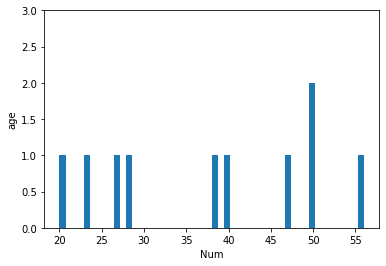

In [ ]:
age = df["AGE"].values.tolist()
plt.hist(age, bins=50)
plt.ylim([0,3])
plt.ylabel("age")
plt.xlabel("Num")

In [ ]:
df["SEX"].values.tolist()

['F', 'M', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'F']

Text(0.5, 0, 'Num')

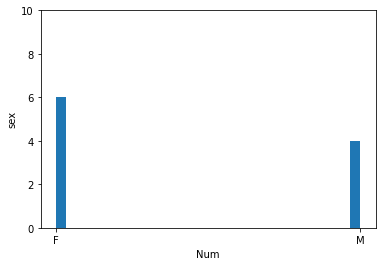

In [ ]:
sex = df["SEX"].values.tolist()
plt.hist(sex, bins=30)
plt.ylim([0,10])
plt.ylabel("sex")
plt.xlabel("Num")

In [ ]:
##그룹화
grouped_sex=df.groupby("SEX")
print(grouped_sex)

In [ ]:
for key, value in grouped_sex:
    print("key : ", key)
    print("value : ", value)

key :  F
value :     ID SEX  AGE     AREA
0   1   F   50    Seoul
2   3   F   28     Jeju
5   6   F   23    Seoul
6   7   F   56  Kyengki
7   8   F   47    Seoul
9  10   F   38  Kyengki
key :  M
value :     ID SEX  AGE     AREA
1   2   M   40  Kyengki
3   4   M   50    Seoul
4   5   M   27    Seoul
8   9   M   20  Incheon


In [ ]:
grouped_area=df.groupby("AREA")
print(grouped_area)

In [ ]:
for key, value in grouped_area:
    print("key : ", key)
    print("value : ", value)

key :  Incheon
value :     ID SEX  AGE     AREA
8   9   M   20  Incheon
key :  Jeju
value :     ID SEX  AGE  AREA
2   3   F   28  Jeju
key :  Kyengki
value :     ID SEX  AGE     AREA
1   2   M   40  Kyengki
6   7   F   56  Kyengki
9  10   F   38  Kyengki
key :  Seoul
value :     ID SEX  AGE   AREA
0   1   F   50  Seoul
3   4   M   50  Seoul
4   5   M   27  Seoul
5   6   F   23  Seoul
7   8   F   47  Seoul


In [ ]:
df.groupby("SEX").sum()

,ID,AGE
SEX,,
F,35,242
M,20,137


# apply() 사용하여 특정 컬럼에 값 부여
# apply(x, 선택, 함수) --> 집합의 원소에 함수를 반복적으로 적용


In [ ]:
df["중년"] = df['AGE'] > 49
df

,ID,SEX,AGE,AREA,중년
0,1,F,50,Seoul,True
1,2,M,40,Kyengki,False
2,3,F,28,Jeju,False
3,4,M,50,Seoul,True
4,5,M,27,Seoul,False
5,6,F,23,Seoul,False
6,7,F,56,Kyengki,True
7,8,F,47,Seoul,False
8,9,M,20,Incheon,False
9,10,F,38,Kyengki,False


In [ ]:
def age_name(AGE):
    name = ''
    if AGE <= 25 : name = '사회초년생'
    elif AGE <= 35 and AGE > 25 : name = "사회생활 1~10년차"
    elif AGE <= 45 : name = "관리자 역할"
    else : name = "은퇴 예정자"
    return name 

In [ ]:
x=df['AGE']
df["AGED"] = df['AGE'].apply(lambda x : )

# 

In [ ]:
file = "/content/chipotle.tsv"
chipo = pd.read_csv(file, sep = "\t")
print(chipo.shape)
print("------------------------------------------")
print(chipo.info())
print("------------------------------------------")

(4622, 5)
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None
------------------------------------------


In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [ ]:
print(chipo.describe())

          order_id     quantity
count  4622.000000  4622.000000
mean    927.254868     1.075725
std     528.890796     0.410186
min       1.000000     1.000000
25%     477.250000     1.000000
50%     926.000000     1.000000
75%    1393.000000     1.000000
max    1834.000000    15.000000


In [ ]:
chipo[["item_name","choice_description","item_price"]].describe()

,item_name,choice_description,item_price
count,4622,3376,4622
unique,50,1043,78
top,Chicken Bowl,[Diet Coke],$8.75
freq,726,134,730


In [ ]:
##범주형 데이터 고유한 종류 출력
chipo['item name'].unique()

KeyError: ignored

In [ ]:
item_count = chipo['item_name'].value_counts()
item_count

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [ ]:
item_count.describe()

count     50.000000
mean      92.440000
std      149.322847
min        1.000000
25%        9.250000
50%       37.500000
75%       99.500000
max      726.000000
Name: item_name, dtype: float64

Text(0.5, 1.0, 'Distribution of all ordered item count')

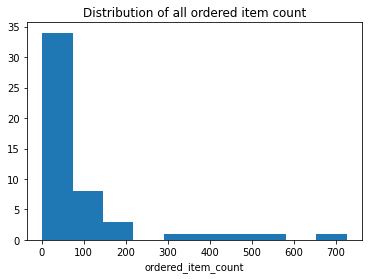

In [ ]:
##hist(막대 그래프) : item_count에 대한 분포
plt.hist(item_count)
plt.xlabel('ordered_item_count')
plt.title("Distribution of all ordered item count")

In [ ]:
item_count_10 = chipo['item_name'].value_counts()[:10]
item_count_10

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [ ]:
item_count_1 = chipo['item_name'].value_counts()[:1]
item_count_1

Chicken Bowl    726
Name: item_name, dtype: int64

In [ ]:
item_count_10 = chipo['item_name'].value_counts()[:10]

for idx, (val, cnt) in enumerate(item_count_10.items(),1):
    print("Top", idx, ":",val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [6]:
import pandas as pd ## 데이터 분석 인공지능
import numpy as np ## 수학적,통계적 계산 
import matplotlib.pyplot as plt ## 데이터 시각화
import random

In [7]:
file = "/content/chipotle.tsv"
chipo = pd.read_csv(file, sep = "\t")

In [8]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [9]:
chipo.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [14]:
item_name_10 = chipo['item_name'].value_counts()[:10]
print(item_name_10)

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64


In [20]:
for idx, (item, value) in enumerate(item_name_10.items(),1):
    print("Top {} : {}".format(idx,value))

Top 1 : 726
Top 2 : 553
Top 3 : 479
Top 4 : 368
Top 5 : 301
Top 6 : 211
Top 7 : 211
Top 8 : 162
Top 9 : 115
Top 10 : 110


In [21]:
for idx, (item, value) in enumerate(item_name_10.items(),1):
    print("Top {} : {}".format(idx,item))

Top 1 : Chicken Bowl
Top 2 : Chicken Burrito
Top 3 : Chips and Guacamole
Top 4 : Steak Burrito
Top 5 : Canned Soft Drink
Top 6 : Steak Bowl
Top 7 : Chips
Top 8 : Bottled Water
Top 9 : Chicken Soft Tacos
Top 10 : Chips and Fresh Tomato Salsa


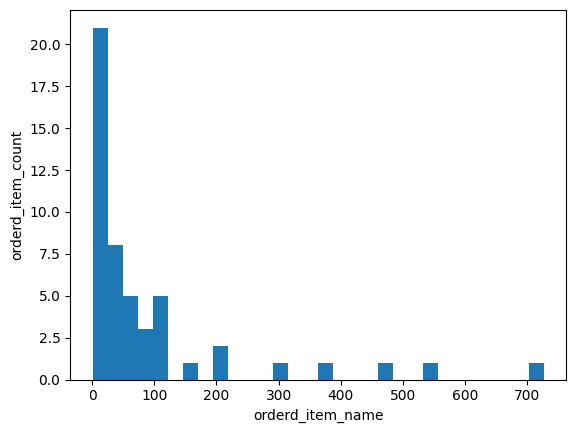

In [23]:
item_name = chipo["item_name"].value_counts()
plt.hist(item_name, bins = 30)
plt.xlabel("orderd_item_name")
plt.ylabel("orderd_item_count")
plt.show()

## 2. 아이템(item_name) 별 주문수량(quantity) 분석
- 아이템별 주문수량 및 총량 구하기
- 시각화 (bar)


In [28]:
item_quantity = chipo.groupby('item_name')['quantity'].count()
item_quantity

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [29]:
##x축으로
item_quantity.index

Index(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos',
       'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink',
       'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos',
       'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos',
       'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos',
       'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
       'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
       'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl',
       'Steak Burrit

In [30]:
##y축으로
item_quantity.values

array([ 54,  66,  91,  11,  10,  25, 162,   2,   6, 104, 301,  68,  59,
         7,   1,   6,  40, 726, 553,  47,   9, 110, 115, 211, 110, 479,
         1,  22,  18,  43,  48,  31,  20,   2,  20,  27,   2, 101, 211,
       368,  35,   4,  29,  55,  85,  95,   1,   6,  18,   7])

In [39]:
item_quantity_index = item_quantity.index.tolist()
x =np.arange(len(item_quantity.index))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [42]:
orderd_cnt = item_quantity.values.tolist()
print(orderd_cnt)

[54, 66, 91, 11, 10, 25, 162, 2, 6, 104, 301, 68, 59, 7, 1, 6, 40, 726, 553, 47, 9, 110, 115, 211, 110, 479, 1, 22, 18, 43, 48, 31, 20, 2, 20, 27, 2, 101, 211, 368, 35, 4, 29, 55, 85, 95, 1, 6, 18, 7]


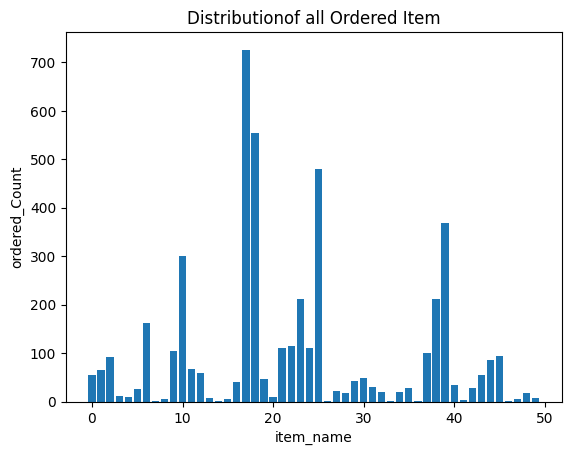

In [43]:
##bar(x,y)
plt.bar(x,orderd_cnt)
plt.xlabel("item_name")
plt.ylabel("ordered_Count")
plt.title("Distributionof all Ordered Item")
plt.show()


# 3. 주문당 평균 주문 금액 계산
- 10달러 이상 주문한 주문 번호 출력
- 아이템별 주문금액 분포도

In [44]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [48]:
chipo.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [61]:
chipo.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [52]:
##주문당 평균 금액 계산
chipo.groupby('order_id')['item_price'].sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [64]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [67]:
item_price = chipo.groupby('order_id')['item_price'].sum()
item_price

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [68]:
##x축 : order_id, y축 : price
item_price.index = item_price.index.tolist()

In [69]:
x = np.arange(len(item_price.index))
x

array([   0,    1,    2, ..., 1831, 1832, 1833])

In [80]:
##y축
item_price.values.tolist()
item_price_values=item_price.values.tolist()
item_price.values
print(item_price_values)

[11.56, 16.98, 12.67, 21.0, 13.7, 17.5, 15.7, 10.88, 10.67, 13.2, 12.38, 14.370000000000001, 10.88, 10.08, 10.88, 10.68, 10.08, 24.9, 13.9, 36.2, 23.36, 12.98, 11.17, 12.07, 11.38, 20.5, 13.9, 33.7, 17.98, 23.36, 10.68, 12.98, 13.2, 28.4, 13.4, 18.0, 18.0, 18.57, 12.2, 32.75, 16.2, 13.7, 20.5, 13.2, 21.97, 11.88, 10.08, 13.7, 16.15, 10.88, 18.57, 12.98, 22.45, 15.7, 10.08, 16.65, 16.2, 10.88, 10.98, 22.5, 16.2, 15.7, 15.7, 22.5, 25.45, 11.48, 19.67, 21.95, 10.88, 21.95, 27.45, 10.98, 21.650000000000002, 22.36, 36.2, 10.67, 11.88, 17.48, 10.98, 11.48, 10.67, 20.95, 24.95, 28.46, 11.38, 22.95, 10.08, 10.88, 16.060000000000002, 20.0, 11.88, 20.15, 38.2, 22.5, 16.2, 35.0, 20.15, 22.3, 13.4, 10.08, 12.98, 14.65, 47.9, 12.2, 17.5, 18.0, 10.98, 21.25, 12.07, 36.0, 17.5, 17.98, 10.08, 13.0, 11.38, 12.2, 12.98, 10.88, 16.98, 10.18, 12.48, 11.77, 23.78, 28.4, 31.7, 20.0, 12.5, 24.95, 29.990000000000002, 11.38, 10.88, 22.15, 10.68, 22.15, 13.2, 17.48, 17.5, 10.67, 12.15, 11.08, 16.98, 11.38, 12.4

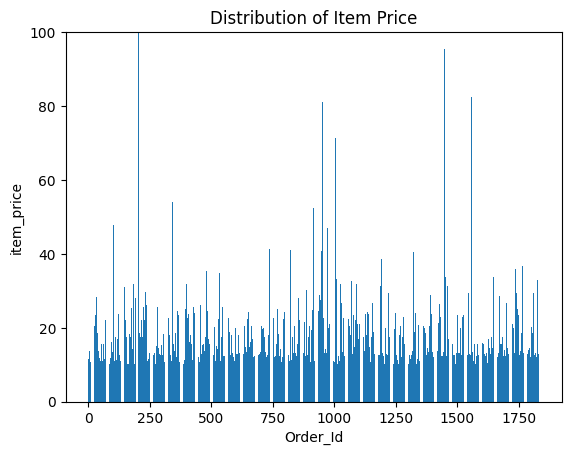

In [81]:
plt.bar(x,item_price_values)
plt.xlabel("Order_Id")
plt.ylabel("item_price")
plt.ylim([0,100])
plt.title("Distribution of Item Price")
plt.show()

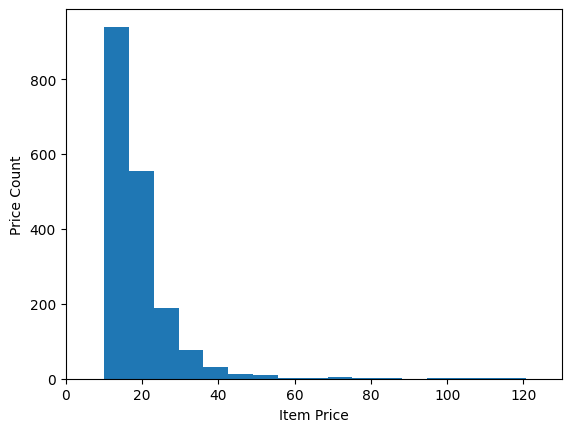

In [83]:
##hist() 그리기
plt.hist(item_price, bins = 30)
plt.xlim([0,130])
plt.xlabel("Item Price")
plt.ylabel("Price Count")
plt.show()